# EDA of movies dataset

## First look at our data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

movies_data_orig = pd.read_csv('data/movies.csv')
ratings_data_orig = pd.read_csv('data/ratings.csv')
print(movies_data_orig.head())
print("- - - - - - - ABOVE IS ORIGINAL MOVIES DATA - - - - - - - - -  - -")
print(ratings_data_orig.head())
print("- - - - - - - - ABOVE IS ORIGINAL RATINGS DATA - - - - - - - -  - -")
# Do the EDA only on the columns (user_id, movie_id and ranting)
movies_data = movies_data_orig.drop(columns=['title', 'genres'])
movies_data = pd.merge(movies_data, ratings_data_orig[['userId', 'movieId', 'rating']], on='movieId', how='left')
print(movies_data.head())
print("- - - - - - - - ABOVE IS FINAL MOVIES DATA - - - - - - - -  - -")

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
- - - - - - - ABOVE IS ORIGINAL MOVIES DATA - - - - - - - - -  - -
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
- - - - - - - - ABOVE IS ORIGINAL RATINGS DATA - - - - - - - -  - -
   movieId  userId  rating
0        1     

## Finding out some potential problems in the data :
1. A movie with same name repeated multiple times and having different ids
2. Same user rating the same movie multiple times, with the same rating / different ratings
3. A user that rated too many movies compared to the others
4. A movie that have too much ratings

In [2]:
# 1. 
print(f"Number of duplicated movies titles: {movies_data_orig['title'].duplicated().sum()}")
movies_dupes = movies_data_orig[movies_data_orig.duplicated('title', keep=False)]
# print(movies_dupes)
print('- - - - - - 5 movies that are repeated with diffrent id - - - - - - - -')
print(movies_dupes[movies_dupes['title'].str.contains('Emma')])
print("- - - - - - Movie Emma repeated but has different id - - - - - - - -")
# 2. 
print(f"Number of duplicated user rating for the same movie: {ratings_data_orig.duplicated(['userId', 'movieId']).sum()}")
# ratings_dupes = ratings_data_orig[ratings_data_orig.duplicated(['movieId', 'userId'], keep=False)]
# print(ratings_dupes)
print("- - - - - - No user has rated the same movie multiple times - - - - - - - -")
# 3. See "Distributions" part for how to find out users rating too much
mean_user_ratings = movies_data['userId'].value_counts().mean()
print(f"Average number of rated movies per user: {mean_user_ratings:.2f}")
print(movies_data['userId'].value_counts().head(3))
print("- - - - - - We can say that a user that rates too much movies is user 414 - - - - - - - -")
# 4. 
mean_movie_ratings = movies_data['movieId'].value_counts().mean()
print(f"Average number of rating per movies: {mean_movie_ratings:.2f}")
print(movies_data['movieId'].value_counts().head(3))
print(movies_data_orig[movies_data_orig['movieId'] == 356])
print("- - - - - - We can say that a movie that has too much ratings is movie 356 (Forrest Gump (1994)) - - - - - - - -")

Number of duplicated movies titles: 5
- - - - - - 5 movies that are repeated with diffrent id - - - - - - - -
      movieId        title                genres
650       838  Emma (1996)  Comedy|Drama|Romance
5601    26958  Emma (1996)               Romance
- - - - - - Movie Emma repeated but has different id - - - - - - - -
Number of duplicated user rating for the same movie: 0
- - - - - - No user has rated the same movie multiple times - - - - - - - -
Average number of rated movies per user: 165.30
userId
414.0    2698
599.0    2478
474.0    2108
Name: count, dtype: int64
- - - - - - We can say that a user that rates too much movies is user 414 - - - - - - - -
Average number of rating per movies: 10.35
movieId
356    329
318    317
296    307
Name: count, dtype: int64
     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War
- - - - - - We can say that a movie that has too much ratings is movie 356 (Forrest Gump (1994)) - -

## Cleanup dataset 

In [4]:
# Change userId back to int 
movies_data['userId'] = movies_data['userId'].fillna(0).astype(int)
# Check if data is correct 
print(movies_data.duplicated().sum())
print("- - - - - - DUPLICATED VALUES - - - - - - - -")
print(movies_data.isnull().sum())
print("- - - - - - MISSING VALUES - - - - - - - -")
print(movies_data.count())
# We can see that there are  18 movies who have no rating 
# Let's remove these 18 movies
movies_data = movies_data.dropna(subset=['rating'])
print("- - - - - - COUNT OF VALUES - - - - - - - -")
# Export data in "clean_data" folder 
movies_data.to_csv('./clean_data/movies_data.csv', index=False)

0
- - - - - - DUPLICATED VALUES - - - - - - - -
movieId    0
userId     0
rating     0
dtype: int64
- - - - - - MISSING VALUES - - - - - - - -
movieId    100836
userId     100836
rating     100836
dtype: int64
- - - - - - COUNT OF VALUES - - - - - - - -


## Distributions

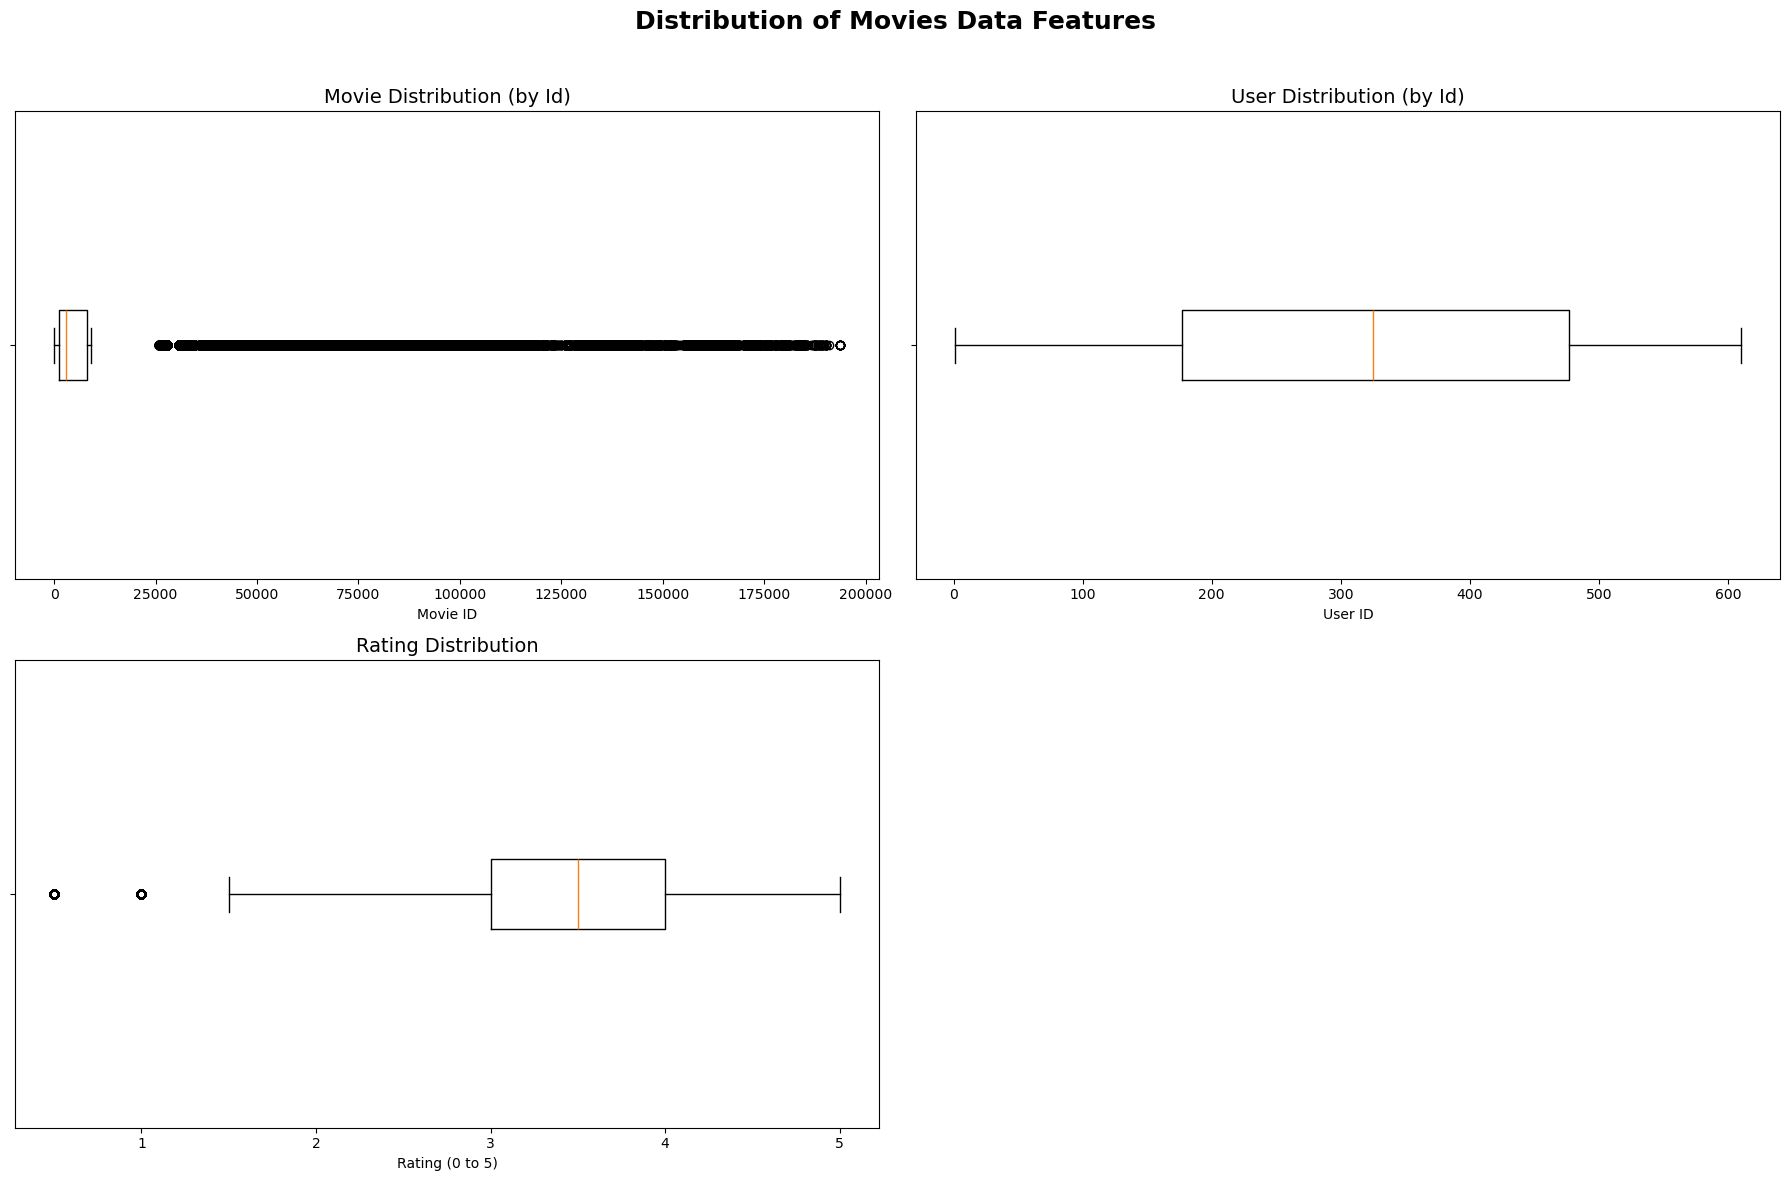

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Movies Data Features', fontsize=18, fontweight='bold')

# movieId distribution
axes[0, 0].boxplot(movies_data['movieId'], vert=False)
axes[0, 0].set_title('Movie Distribution (by Id)', fontsize=14)
axes[0, 0].set_xlabel('Movie ID')
axes[0, 0].set_yticklabels([])

# userId distribution
axes[0, 1].boxplot(movies_data['userId'], vert=False)
axes[0, 1].set_title('User Distribution (by Id)', fontsize=14)
axes[0, 1].set_xlabel('User ID')
axes[0, 1].set_yticklabels([])

# rating distribution
axes[1, 0].boxplot(movies_data['rating'], vert=False)
axes[1, 0].set_title('Rating Distribution', fontsize=14)
axes[1, 0].set_xlabel('Rating (0 to 5)')
axes[1, 0].set_yticklabels([])

# Hide the unused subplot (bottom right) and make it look nice
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

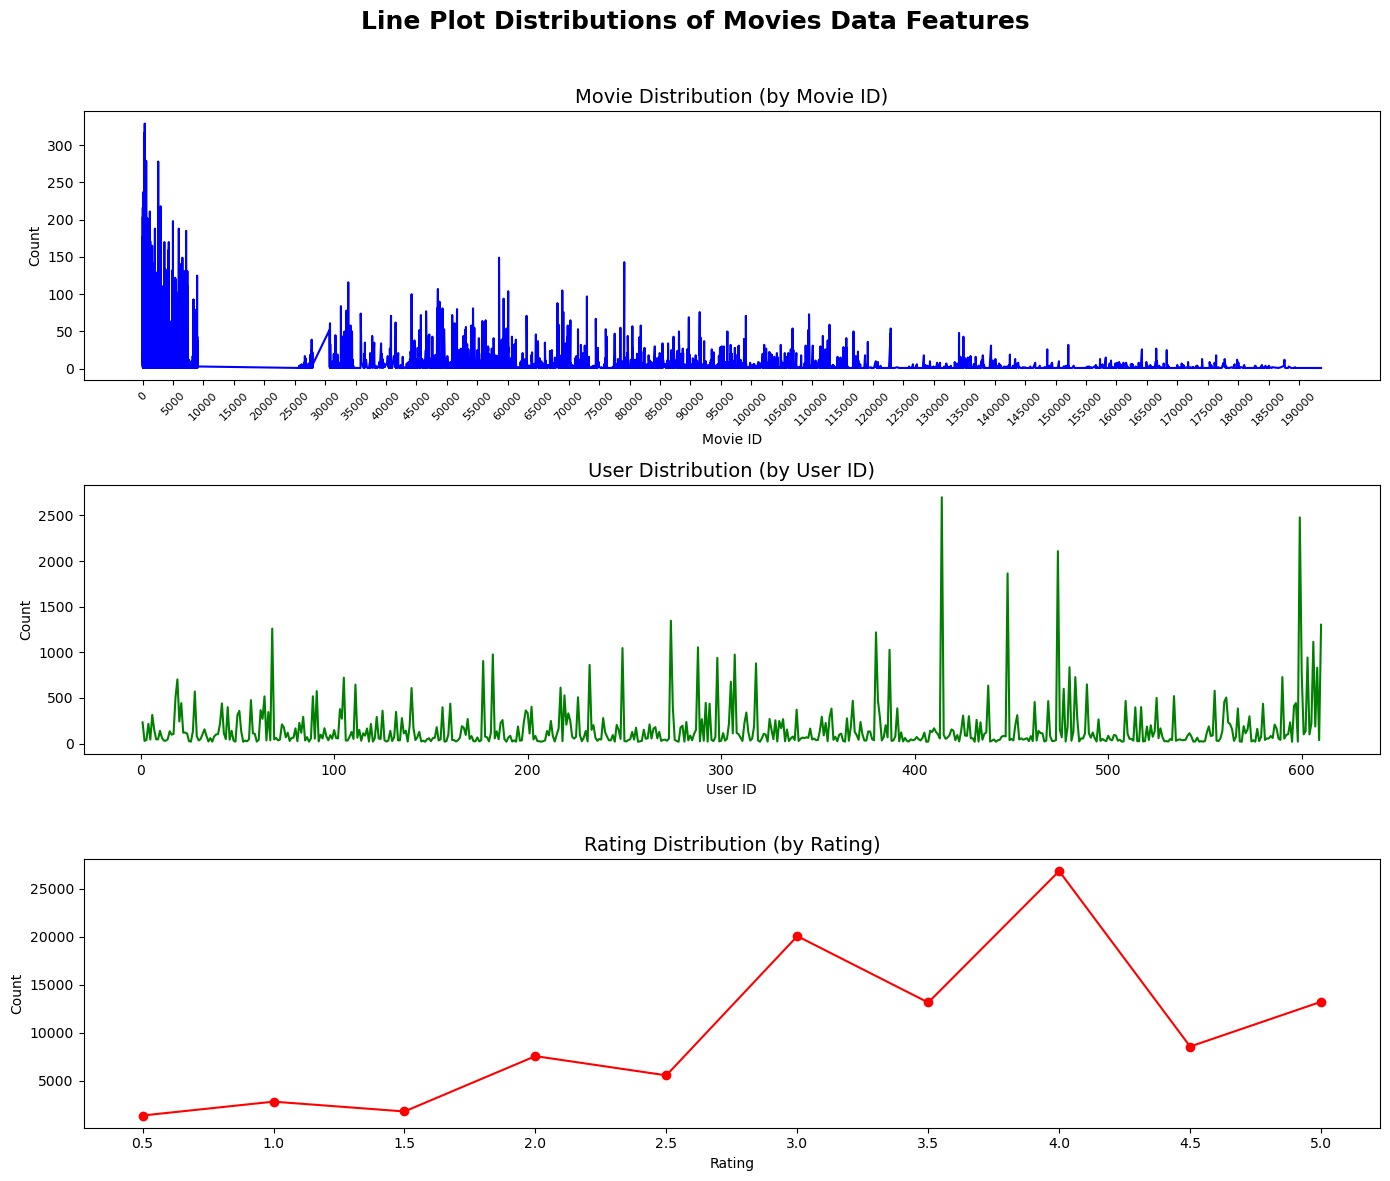

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Line Plot Distributions of Movies Data Features', fontsize=18, fontweight='bold')

# movieId line distribution
movie_counts = movies_data['movieId'].value_counts().sort_index()
movie_counts.plot.line(ax=axes[0], color='blue')
axes[0].set_title('Movie Distribution (by Movie ID)', fontsize=14)
axes[0].set_xlabel('Movie ID')
axes[0].set_ylabel('Count')

# Steps of 1000 so it looks readable
max_movie_id = movie_counts.index.max()
xticks = np.arange(0, max_movie_id + 1, 5000)
axes[0].set_xticks(xticks)
# Reduce font size of x-axis tick labels to avoid overlap
axes[0].tick_params(axis='x', labelsize=8, labelrotation=45)  # smaller font size, adjust as needed

# userId line distribution
user_counts = movies_data['userId'].value_counts().sort_index()
user_counts.plot.line(ax=axes[1], color='green')
axes[1].set_title('User Distribution (by User ID)', fontsize=14)
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Count')

# Rating line distribution
rating_counts = movies_data['rating'].value_counts().sort_index()
rating_counts.plot.line(ax=axes[2], marker='o', color='red')
axes[2].set_title('Rating Distribution (by Rating)', fontsize=14)
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Count')
axes[2].set_xticks(rating_counts.index)  # Show all rating values on x-axis

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


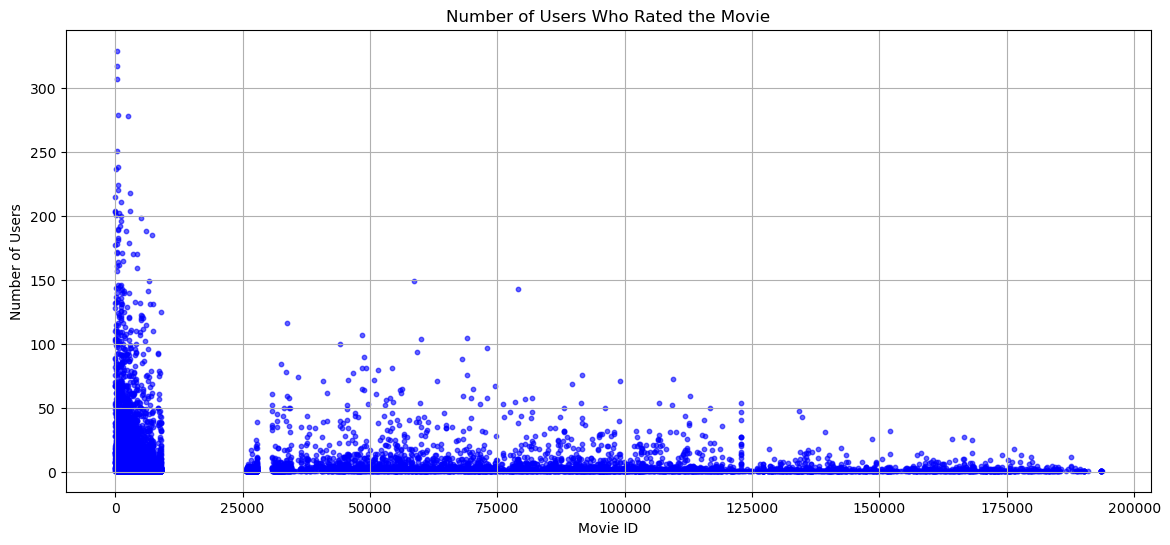

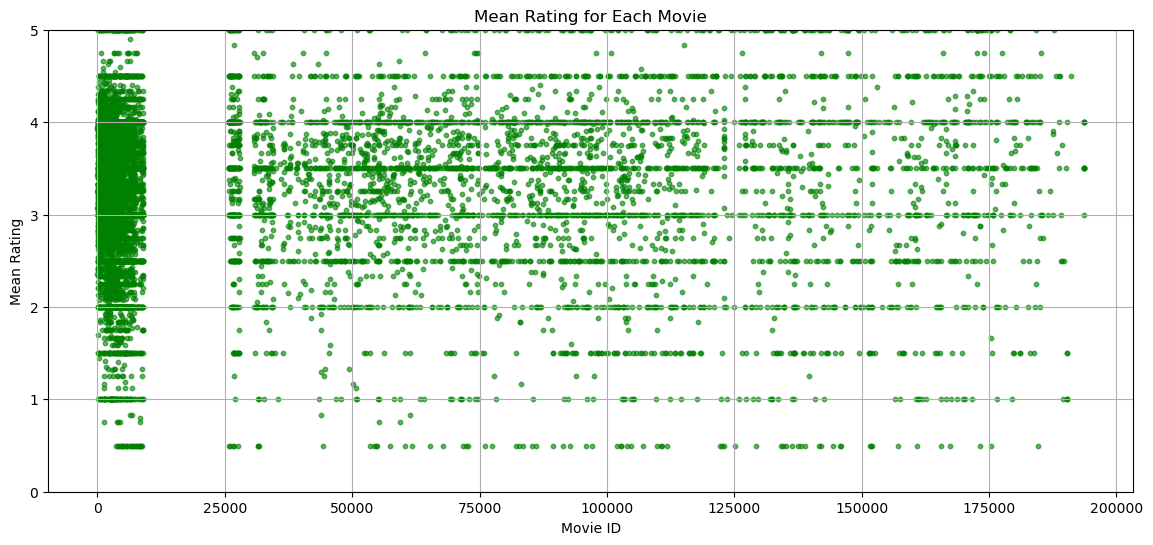

In [ ]:
import matplotlib.pyplot as plt

# Aggregate data
user_counts = movies_data.groupby('movieId')['userId'].nunique()
mean_ratings = movies_data.groupby('movieId')['rating'].mean()

plt.figure(figsize=(14, 6))
plt.scatter(user_counts.index, user_counts.values, alpha=0.6, color='blue', s=10)
plt.title('Number of Users Who Rated the Movie')
plt.xlabel('Movie ID')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.scatter(mean_ratings.index, mean_ratings.values, alpha=0.6, color='green', s=10)
plt.title('Mean Rating for Each Movie')
plt.xlabel('Movie ID')
plt.ylabel('Mean Rating')
plt.ylim(0, 5)
plt.grid(True)
plt.show()


## Analysis

Data quality : 
- Some problems are present, such as movies having same name repeated multiple times and having different ids, users that rate way too much movies (as seen in the disitributions graphs), and movies that have too much ratings (as seen in the disitributions graphs again)
- 18 movies in provided data where not rated, meaning they don't provide releveant information for recommendation
- We have 100854 movies in total, but there is a big gap of around 15000 missing movies, roughly between indexes 10000 and 25000

Data sparsity : 
- Most of the movies are forgetable items, only the first 10000 have the most reviews (popular) wheras the rest is in the "long tail" problem
- The maximum amount of movies a user review is around 300, which is a fraction of the total movies 

Data skewness : 
- There is a clear item popularity bias for the first 10000 movies
- User activity seems pretty balanced, most users rate few movies